In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


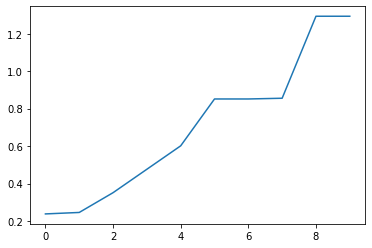

In [2]:
# read in memory log
with open('memory_profiler.log') as f:
    lines = f.readlines()
lines[6][22:28]
num_items = np.arange(0,50000,1000)
mem = []
for i in lines:
    if " 33 " in i:
        mem.append(float(i[22:28]))

plt.plot(mem)


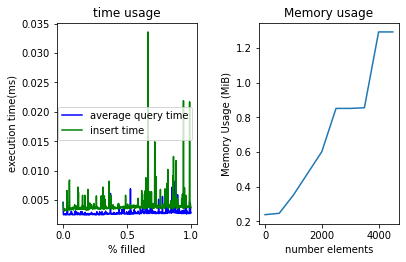

In [16]:
time = pd.read_csv("time_benchmark.csv",delimiter=',',index_col = 0)

fig, (ax1,ax2) = plt.subplots(1,2)

percent_filled = time.index/5000

ax1.plot(percent_filled,time["search_total_time"],label = "average query time",color = 'b')
ax1.plot(percent_filled,time["insert_total_time"],label = "insert time",color = 'g')

ax1.set_xlabel("% filled")
ax1.set_ylabel("execution time(ms)")
ax1.set_title("time usage")

ax1.legend()

num_items = np.arange(0,5000,500)

ax2.set_xlabel("number elements")
ax2.set_ylabel("Memory Usage (MiB)")
ax2.set_title("Memory usage")
ax2.plot(num_items,mem)
fig.tight_layout(pad=2.0)
